# Example Visualization with SOMs

### Imports

In [99]:
import seaborn.objects as so
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dbgsom import DBGSOM
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.pipeline import Pipeline


## load data

In [35]:
digits, target = load_digits(return_X_y=True)
fashion_mnist = pd.read_csv(
    "F:\\Dokumente\\git\\fashion_mnist\\fashion-mnist_train.csv"
)

fashion_mnist_target = fashion_mnist.label
fashion_mnist_train = fashion_mnist.drop("label", axis=1)


### Defining and fitting the som

In [89]:
som = DBGSOM(
    max_neurons=50,
    sf=0.3,
    n_epochs_max=200,
    random_state=42,
    metric="cosine",
    coarse_training_frac=0.5
    # nn_method="pynndescent"
)

scaler = StandardScaler()

pipe = Pipeline(
    steps=[
        # ("scaler", scaler),
        ("som", som),
    ]
)

data = fashion_mnist_train

pipe.fit(data)


 64%|██████▎   | 127/200 [03:25<01:58,  1.62s/ epochs]


Pipeline(steps=[('som',
                 DBGSOM(coarse_training_frac=0.5, max_neurons=50,
                        metric='cosine', n_epochs_max=200, random_state=42,
                        sf=0.3))])

### Plotting results

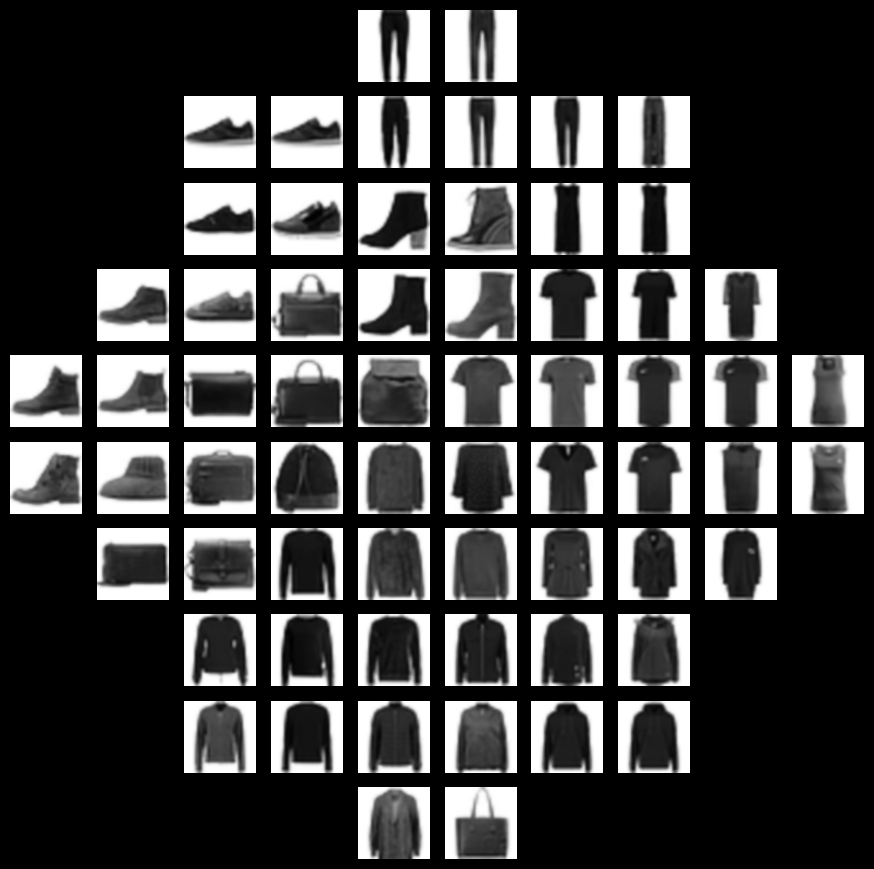

In [106]:
from matplotlib.gridspec import GridSpec

plt.figure(figsize=(20, 20))

som = pipe.named_steps["som"]

min, max = (np.array(som.neurons_).min(), np.array(som.neurons_).max())
dim = abs(max - min)
nn = pipe.transform(data).argmin(axis=0)

gs = GridSpec(2 * dim, 2 * dim)
for index, neuron in enumerate(som.neurons_):
    neuron += dim
    plt.subplot(gs[neuron[0], neuron[1]])
    plt.imshow(
        data.to_numpy()[nn[index]].reshape(28, 28), cmap="Greys", interpolation="bicubic"
    )
    plt.axis("off")


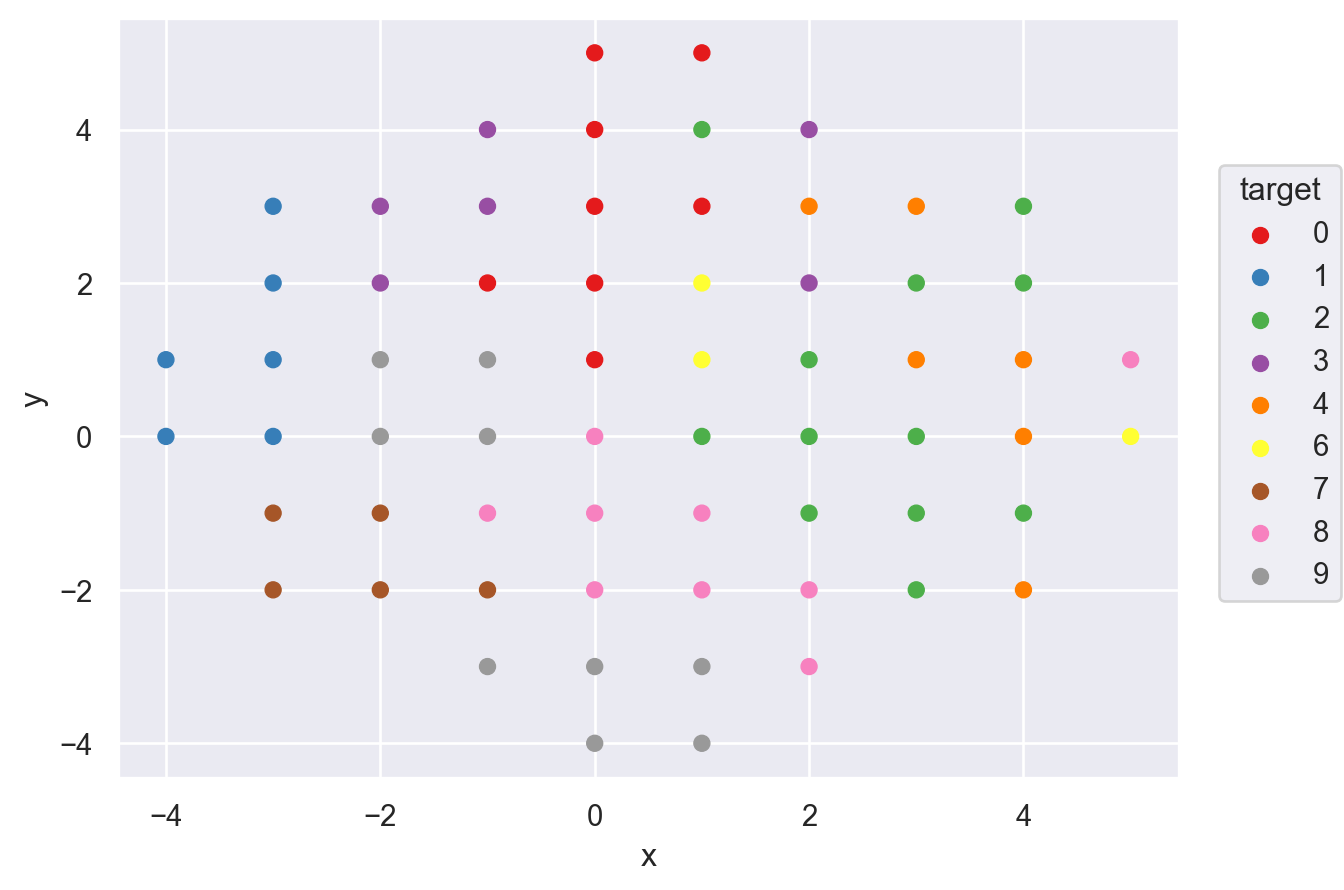

In [98]:
weights = pipe.named_steps["som"].weights_
dots = pd.DataFrame(np.array(pipe.named_steps["som"].neurons_), columns=["x", "y"])
dots["epoch_created"] = list(
    dict(pipe.named_steps["som"].som_.nodes.data("epoch_created")).values()
)
dots["error"] = list(dict(pipe.named_steps["som"].som_.nodes.data("error")).values())
dots["target"] = fashion_mnist_target[nn].to_numpy()
so.Plot(dots, x="x", y="y", color="target").add(so.Dot()).scale(color="Set1")
